In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import timm

/home/nomura/ML/env_tf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
print(torch.cuda.is_available())

cpu
False


In [3]:

transform = transforms.Compose(
    [transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
from torch.utils.data import Subset

num_samples = 1000  # 取り出したいサンプル数
indices = torch.randperm(len(trainset))[:num_samples]  # ランダムにインデックスを選択
trainset = Subset(trainset, indices)  # サブセットを作成

print(trainset)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=4,
                                          pin_memory=True)

# testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                        download=True, transform=transform)

# num_samples = 300  # 取り出したいサンプル数
# indices = torch.randperm(len(testset))[:num_samples]  # ランダムにインデックスを選択
# testset = Subset(testset, indices)  # サブセットを作成

# testloader = torch.utils.data.DataLoader(testset, batch_size=16,
#                                          shuffle=False, num_workers=4,
#                                          pin_memory=True)

model = timm.create_model('vit_base_patch16_224', pretrained=True)
model.head = nn.Linear(model.head.in_features, 10)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


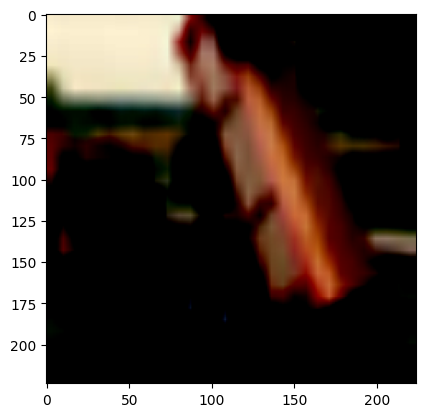

In [4]:
import matplotlib.pyplot as plt
plt.imshow(trainset[0][0].permute(1, 2, 0))

In [5]:
from tqdm import tqdm

for epoch in range(8):  # loop over the dataset multiple times
    progress_bar = tqdm(enumerate(trainloader, 0), total=len(trainloader), desc="Epoch: %d" % epoch)
    for i, data in progress_bar:
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Update the progress bar
        progress_bar.set_postfix({'loss': loss.item()})

Epoch: 2:  59%|█████▊    | 37/63 [05:21<03:45,  8.69s/it, loss=0.0094] 


KeyboardInterrupt: 

: 

In [16]:
# Test the model
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

: 